In [2]:
%matplotlib inline

import sys, os
sys.path.append(os.path.abspath(os.path.join('..', 'src/')))
from sgpi.util import get_dataset, get_xy, get_r_squared, split, to_data_matrix
from sgpi.plot import *

from sgpi import model
from sgpi.learner import SGRegressionLearner

import pandas as pd
import pysgpp as sg

from fractions import Fraction

In [3]:
def inverse_parabola(x, y):
    z = 16*x*(1-x)*y*(1-y)
    return z

def get_data(num=100):
    np.random.seed(42)
    x = np.linspace(0, 1, num)
    y = x
    z = inverse_parabola(x,y) 
    return x, y, z

def plot_contour(x, y):
    x, y = np.meshgrid(x, y)
    z = inverse_parabola(x,y)
    fig, ax = plt.subplots(figsize=(6,6))
    ax.contourf(x,y,z)
    sns.despine(fig)
    return fig, ax

In [4]:
x,y,z = get_data(num=100)
X = np.vstack((x,y)).T

(<matplotlib.figure.Figure at 0x7f39545f70d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3942173dd0>)

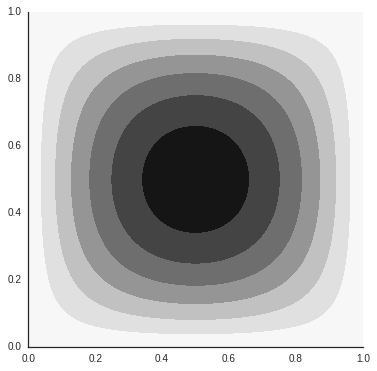

In [5]:
plot_contour(x,y)

In [280]:
grid_config = model.GridConfig(type=sg.GridType_Linear, level=4, T=0) # use standard linear basis
adaptivity_config = model.AdaptivityConfig(num_refinements=0, no_points=0, treshold=0.0, percent=0.0)
reg_type = sg.RegularizationType_Identity
solv_type = sg.SLESolverType_CG

solver_config = model.SolverConfig(type=solv_type, max_iterations=1000, epsilon=0, threshold=10e-32)
final_solver_config = solver_config

regularization_config = model.RegularizationConfig(type=reg_type, exponent_base=1, lambda_reg=0.0, l1_ratio=1.0)

estimator = SGRegressionLearner(grid_config, regularization_config, solver_config,
                                final_solver_config, adaptivity_config)

In [281]:
estimator.fit(X, z)

In [282]:
-estimator.score(X,z)

7.454469073497021e-07

In [289]:
def get_grid_points(grid, weights):
    storage = grid.getStorage()
    indices = []
    for i in range(0, grid.getSize()):
        index = storage.get(i)
        x_pos = index.getCoord(0)
        y_pos = index.getCoord(1)
        prior = weights[i]
        indices.append( (x_pos,y_pos, prior) )
    return indices

def plot_diagonal(grid, weights):
    indices = get_grid_points(grid, weights)
    df = pd.DataFrame(indices, columns=['x', 'y', 'prior'])
    
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.set_axis_off()
    ax.set(adjustable='box-forced', aspect='equal')
    for name, group in df.groupby('prior'):
        ax.plot(group['x'], group['y'], label=Fraction(name), linewidth=0, marker='$ {0:.3f} $'.format(name),
                markersize=40)
    return fig, ax

In [290]:
grid = estimator._learner.getGrid()
weights = estimator.get_weights()

(<matplotlib.figure.Figure at 0x7fc9adb18690>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc9adb103d0>)

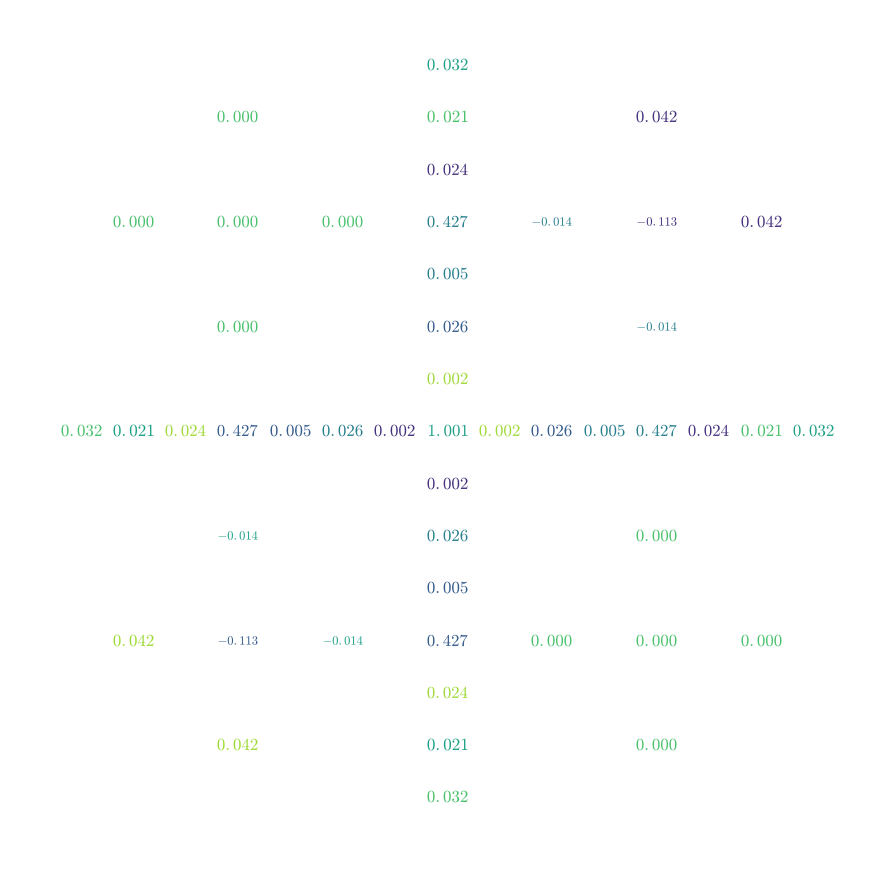

In [291]:
plot_diagonal(grid, weights)

In [292]:
1.0/64

0.015625